In [84]:
import sys
import os
from os.path import join as j
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

project_root = os.path.abspath('../')

In [94]:
csv_file = j(project_root,'data','interm','cv_test_loss.csv')

weights = ['01','05','10','20']
Nsteps = 800

runs = {}
for w in weights:
    runs[w] = np.zeros((3,Nsteps), dtype=float)

with open(csv_file,'r') as fin:
    for line in fin:
        data = line.split(",")
        run = data[0]
        if run == "src/models/runs/CV_RUNS/Jul21_17-00-34_gn48.ecomputeCE05_CV0":
            continue
        
        weight = run.split(".")[1].split("_")[0][-2:]
        fold = int(run.split(".")[1].split("_")[1][2])
        values = np.array(data[1:], dtype=float)
        
        n = np.min((len(values),Nsteps))
        runs[weight][fold][:n] = values[:n]
    
        

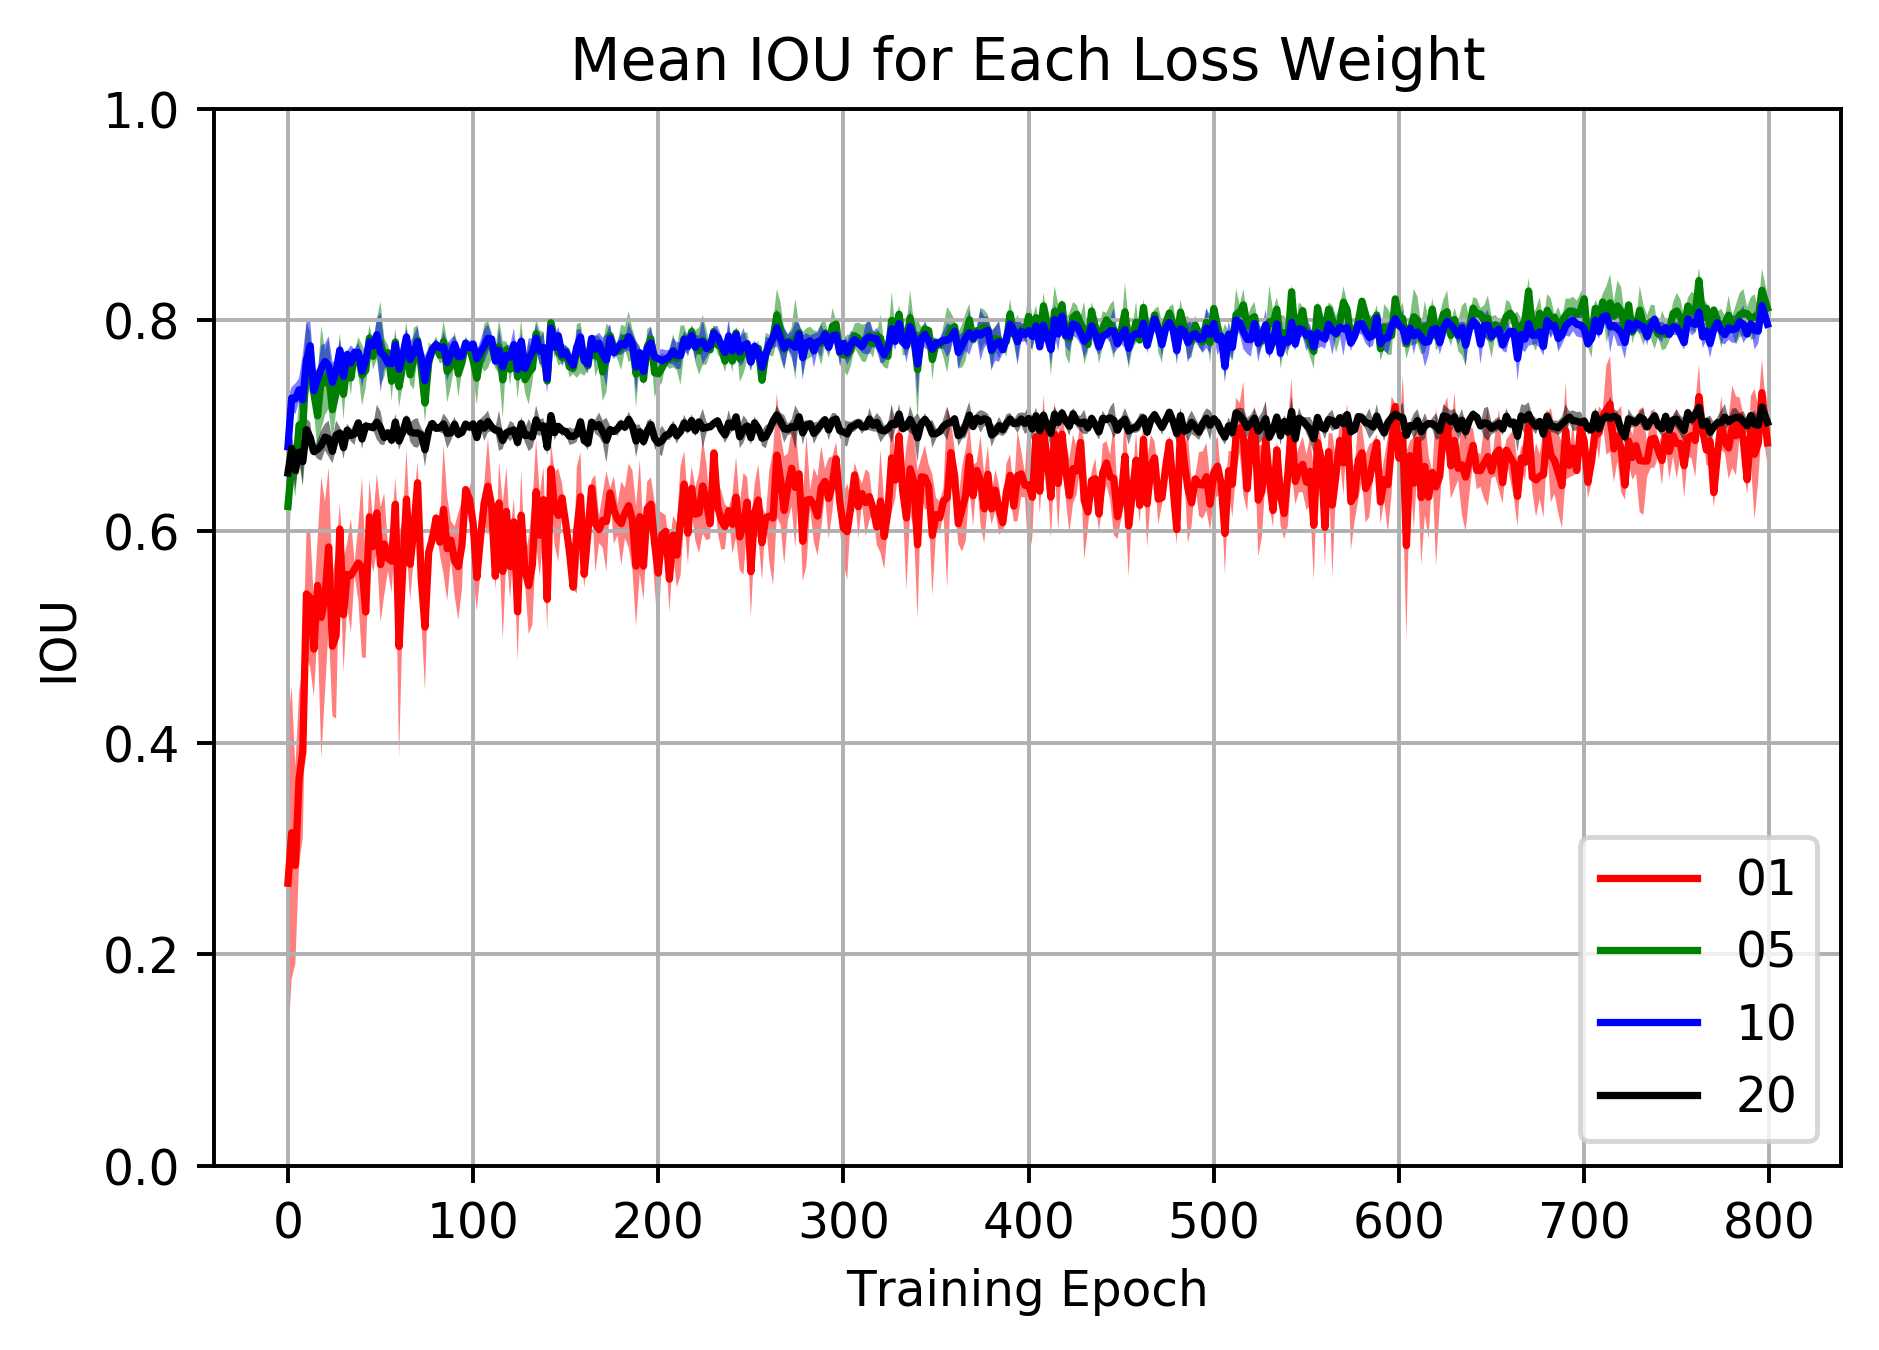

In [126]:
colors = {
    '01': 'r',
    '10': 'b',
    '20': 'k',
    '05': 'g',
}

fig = plt.figure(dpi=350)

for key,value in runs.items():
    x = np.arange(Nsteps)
    y = 1-value.mean(axis=0)
    error = value.std(axis=0)
   
    idx = np.linspace(0,len(x)-1,400,dtype=int)
    x = x[idx]
    y = y[idx]
    error = error[idx]
    
    plt.plot(x,y,label=key,c =colors[key])
    plt.fill_between(x, y-error, y+error,
            alpha=0.5, facecolor=colors[key])
    
plt.ylim((0,1))
plt.title("Mean IOU for Each Loss Weight")
plt.legend()
plt.ylabel('IOU')
plt.xlabel('Training Epoch')
plt.grid()
plt.show()
fig.savefig(j(project_root,'reports','Weight_IOU.png'))

# 